# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         23056950      1  regionprofile   
                                             277482448     1  regionprofile   
                                             342617063     1  regionprofile   
                                             362352209     1  regionprofile   
                                             1032065064    1  regionprofile   
                                             1491153857    1  regionprofile   
                                             1642830958    1  regionprofile   
                                             2104588869    1  regionprofile   
                                             2172300790    1  regionprofile   
                                             2456766213    1  regionprofile   
                                             2496855500    1  regionprofile   
                                             2565622787    1  regionprofile   
                                             2626279528    1  regionprofile   
                                             3043616485    1  regionprofile   
                                             3184293845    1  regionprofile   
                                             3446572744    1  regionprofile   
                                             3452477975    1  regionprofile   
                                             3526872179    1  regionprofile   
                                             3764152635    1  regionprofile   
                                             3925186993    1  regionprofile   
{'name': 'comm', 'type': 'function'}         23056950      3  regionprofile   
                                             277482448     3  regionprofile   
                                             342617063     3  regionprofile   
                                             362352209     3  regionprofile   
                                             1032065064    3  regionprofile   
                                             1491153857    3  regionprofile   
                                             1642830958    3  regionprofile   
                                             2104588869    3  regionprofile   
                                             2172300790    3  regionprofile   
                                             2456766213    3  regionprofile   
                                             2496855500    3  regionprofile   
                                             2565622787    3  regionprofile   
                                             2626279528    3  regionprofile   
                                             3043616485    3  regionprofile   
                                             3184293845    3  regionprofile   
                                             3446572744    3  regionprofile   
                                             3452477975    3  regionprofile   
                                             3526872179    3  regionprofile   
                                             3764152635    3  regionprofile   
                                             3925186993    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   23056950      4  regionprofile   
                                             277482448     4  regionprofile   
                                             342617063     4  regionprofile   
                                             362352209     4  regionprofile   
                                             1032065064    4  regionprofile   
                                             1491153857    4  regionprofile   
                                             1642830958    4  regionprofile   
                                             2104588869    4  regionprofile   
                                             2172300790    4  regionprofile   
                            

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
23056950,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027323,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,512,512,4,Handwritten
277482448,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700021535,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,64,1024,4,Handwritten
342617063,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027402,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Random,512,2048,4,Handwritten
362352209,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701200648,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 1, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Random,1,4194304,4,Handwritten
1032065064,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027241,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,256,256,4,Handwritten
1491153857,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027349,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Random,64,16384,4,Handwritten
1642830958,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027303,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,128,2048,4,Handwritten
2104588869,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027451,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Random,512,8192,4,Handwritten
2172300790,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027323,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,256,1024,4,Handwritten


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy_1
├─ 1.000 comp
│  └─ 1.000 comp_large
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b7aaab02760>, 262144: <thicket.thicket.Thicket object at 0x2b7aaab84ee0>, 1048576: <thicket.thicket.Thicket object at 0x2b7aaaa29fd0>, 4194304: <thicket.thicket.Thicket object at 0x2b7aaab96940>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2b7aaab02760>, 262144: <thicket.thicket.Thicket object at 0x2b7aaab84ee0>, 1048576: <thicket.thicket.Thicket object at 0x2b7aaaa29fd0>, 4194304: <thicket.thicket.Thicket object at 0x2b7aaab96940>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2b7aaab02760>, <thicket.thicket.Thicket object at 0x2b7aaab84ee0>, <thicket.thicket.Thicket object at 0x2b7aaaa29fd0>, <thicket.thicket.Thicket object at 0x2b7aaab96940>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [11]:
ctk.dataframe

65536                 \
                                                           nid   spot.channel   
node                                         num_threads                        
{'name': 'main', 'type': 'function'}         1               1  regionprofile   
                                             64              1  regionprofile   
                                             128             1  regionprofile   
                                             256             1  regionprofile   
                                             512             1  regionprofile   
{'name': 'comm', 'type': 'function'}         1               3  regionprofile   
                                             64              3  regionprofile   
                                             128             3  regionprofile   
                                             256             3  regionprofile   
                                             512             3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   1               4  regionprofile   
                                             64              4  regionprofile   
                                             128             4  regionprofile   
                                             256             4  regionprofile   
                                             512             4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 1               5  regionprofile   
                                             64              5  regionprofile   
                                             128             5  regionprofile   
                                             256             5  regionprofile   
                                             512             5  regionprofile   
{'name': 'comp', 'type': 'function'}         1               6  regionprofile   
                                             64              6  regionprofile   
                                             128             6  regionprofile   
                                             256             6  regionprofile   
                                             512             6  regionprofile   
{'name': 'comp_large', 'type': 'function'}   1               7  regionprofile   
                                             64              7  regionprofile   
                                             128             7  regionprofile   
                                             256             7  regionprofile   
                                             512             7  regionprofile   
{'name': 'data_init', 'type': 'function'}    1               2  regionprofile   
                                             64              2  regionprofile   
                                             128             2  regionprofile   
                                             256             2  regionprofile   
                                             512             2  regionprofile   

                                                                        \
                                                         Min time/rank   
node                                         num_threads                 
{'name': 'main', 'type': 'function'}         1                0.407951   
                                             64               0.495571   
                                             128              0.465160   
                                             256              0.604006   
                                             512              0.609716   
{'name': 'comm', 'type': 'function'}         1                0.000183   
                                             64               0.000164   
                                             128              0.000186   
                                             256              0.000151   
                                             512              0.000134   
{'name': 'comm_l

Perform pandas operations to get the table in a desirable format for plotting

In [12]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [13]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [14]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [16]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [17]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [18]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [19]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [20]:
ctk.dataframe

65536     262144    1048576    4194304
                         Total time Total time Total time Total time
name         num_threads                                            
main         1             0.407951   0.366090   0.575533   1.280906
             64            0.495571   0.332067   0.457133   0.659693
             128           0.465160   0.328475   0.343786   0.689057
             256           0.604006   0.531673   0.235333   0.664524
             512           0.609716   0.608071   0.342254   0.666225
comm         1             0.000183   0.000320   0.001060   0.003719
             64            0.000164   0.000316   0.001449   0.003756
             128           0.000186   0.000320   0.001053   0.003781
             256           0.000151   0.000306   0.001089   0.003702
             512           0.000134   0.000328   0.001056   0.003703
comm_large   1             0.000131   0.000281   0.001027   0.003685
             64            0.000130   0.000285   0.001399   0.003730
             128           0.000153   0.000286   0.001019   0.003750
             256           0.000118   0.000278   0.001055   0.003673
             512           0.000108   0.000298   0.001025   0.003663
cudaMemcpy_1 1             0.000116   0.000264   0.001008   0.003667
             64            0.000115   0.000267   0.001365   0.003712
             128           0.000137   0.000269   0.001001   0.003733
             256           0.000103   0.000261   0.001035   0.003653
             512           0.000094   0.000282   0.001007   0.003646
comp         1             0.000631   0.000503   0.000625   0.000672
             64            0.000451   0.000527   0.000940   0.000713
             128           0.000440   0.000491   0.000589   0.000693
             256           0.000483   0.000516   0.000709   0.000705
             512           0.000389   0.000443   0.000600   0.000640
comp_large   1             0.000615   0.000493   0.000615   0.000662
             64            0.000441   0.000517   0.000920   0.000702
             128           0.000430   0.000480   0.000579   0.000682
             256           0.000473   0.000506   0.000697   0.000694
             512           0.000380   0.000434   0.000590   0.000630
data_init    1             0.000882   0.003282   0.012031   0.049823
             64            0.000820   0.003216   0.013201   0.048727
             128           0.000865   0.003232   0.012039   0.048626
             256           0.000824   0.003254   0.011874   0.048719
             512           0.000823   0.003266   0.012627   0.049538

In [21]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [23]:
df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,Avg time/rank
num_threads,
1,0.407951
64,0.495571
128,0.465160
256,0.604006
512,0.609716


In [30]:
# import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

In [25]:
# # for matrix in matrix_sizes:
    
# for name in function_names:
#     plot_pandas(
#         df=ctk.dataframe.loc[name],
#         title=name,
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         loglog=True,
#         figsize=(20, 20)
#     )
#     plt.show()

In [26]:
# ctk.dataframe

## SPEEDUP


In [27]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [28]:
speedup_df

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         1                1.000000      1.000000      1.000000   
             64               0.823194      1.102458      1.259006   
             128              0.877012      1.114514      1.674102   
             256              0.675409      0.688562      2.445611   
             512              0.669084      0.602051      1.681596   
comm         1                1.000000      1.000000      1.000000   
             64               1.115854      1.012658      0.731539   
             128              0.983871      1.000000      1.006648   
             256              1.211921      1.045752      0.973370   
             512              1.365672      0.975610      1.003788   
comm_large   1                1.000000      1.000000      1.000000   
             64               1.007692      0.985965      0.734096   
             128              0.856209      0.982517      1.007851   
             256              1.110169      1.010791      0.973460   
             512              1.212963      0.942953      1.001951   
cudaMemcpy_1 1                1.000000      1.000000      1.000000   
             64               1.008696      0.988764      0.738462   
             128              0.846715      0.981413      1.006993   
             256              1.126214      1.011494      0.973913   
             512              1.234043      0.936170      1.000993   
comp         1                1.000000      1.000000      1.000000   
             64               1.399113      0.954459      0.664894   
             128              1.434091      1.024440      1.061121   
             256              1.306418      0.974806      0.881523   
             512              1.622108      1.135440      1.041667   
comp_large   1                1.000000      1.000000      1.000000   
             64               1.394558      0.953578      0.668478   
             128              1.430233      1.027083      1.062176   
             256              1.300211      0.974308      0.882353   
             512              1.618421      1.135945      1.042373   
data_init    1                1.000000      1.000000      1.000000   
             64               1.075610      1.020522      0.911370   
             128              1.019653      1.015470      0.999335   
             256              1.070388      1.008605      1.013222   
             512              1.071689      1.004899      0.952800   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         1                1.000000  
             64               1.941670  
             128              1.858926  
             256              1.927554  
             512              1.922633  
comm         1                1.000000  
             64               0.990149  
             128              0.983602  
             256              1.004592  
             512              1.004321  
comm_large   1                1.000000  
             64               0.987936  
             128              0.982667  
             256              1.003267  
             512              1.006006  
cudaMemcpy_1 1                1.000000  
             64               0.987877  
             128              0.982320  
             256              1.003832  
             512              1.005760  
comp         1                1.000000  
             64               0.942496  
             128              0.969697  
             256              0.953191  
             512              1.050000  
comp_large   1                1.000000  
             64               0.943020  
             128              0.970674  
             256              0.953890  
             512              1.050794  
data_init    1     

<Figure size 1440x1440 with 0 Axes>

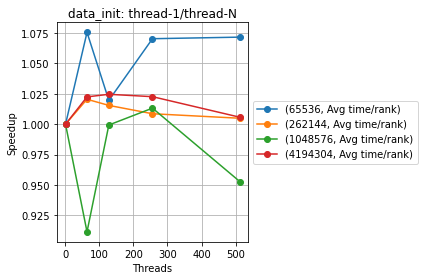

<Figure size 1440x1440 with 0 Axes>

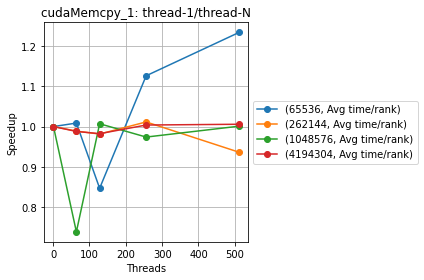

<Figure size 1440x1440 with 0 Axes>

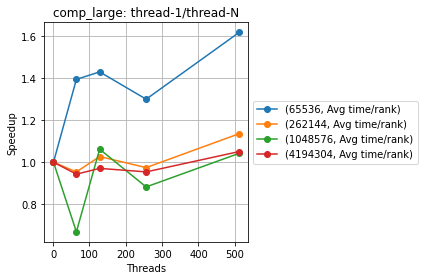

<Figure size 1440x1440 with 0 Axes>

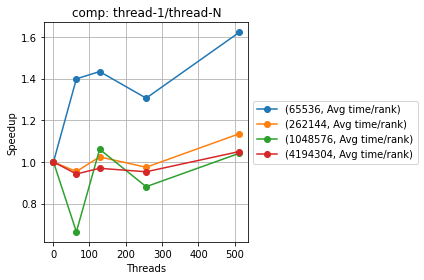

<Figure size 1440x1440 with 0 Axes>

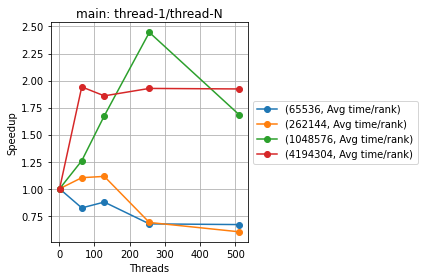

<Figure size 1440x1440 with 0 Axes>

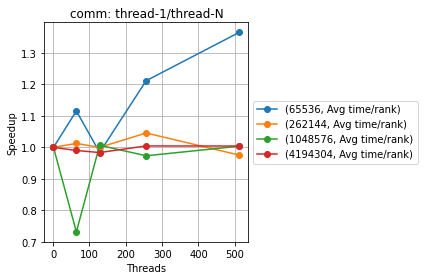

<Figure size 1440x1440 with 0 Axes>

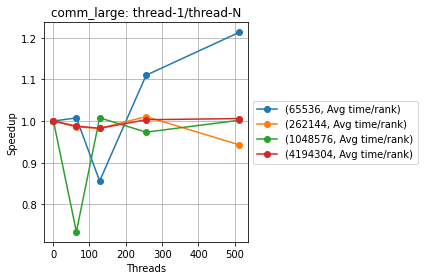

In [31]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## Weak Scaling ---------------------------------------------------------------------------------------

In [32]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("random/*.cali"))

In [33]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         297035287     1  regionprofile   
                                             373490395     1  regionprofile   
                                             491843624     1  regionprofile   
                                             507076356     1  regionprofile   
                                             763295353     1  regionprofile   
                                             1297483145    1  regionprofile   
                                             1417892763    1  regionprofile   
                                             2039019622    1  regionprofile   
                                             2115852557    1  regionprofile   
                                             2120679183    1  regionprofile   
                                             2588313204    1  regionprofile   
                                             3399851597    1  regionprofile   
                                             3416801450    1  regionprofile   
                                             4053708718    1  regionprofile   
                                             4200733631    1  regionprofile   
                                             4222482542    1  regionprofile   
{'name': 'comm', 'type': 'function'}         297035287     3  regionprofile   
                                             373490395     3  regionprofile   
                                             491843624     3  regionprofile   
                                             507076356     3  regionprofile   
                                             763295353     3  regionprofile   
                                             1297483145    3  regionprofile   
                                             1417892763    3  regionprofile   
                                             2039019622    3  regionprofile   
                                             2115852557    3  regionprofile   
                                             2120679183    3  regionprofile   
                                             2588313204    3  regionprofile   
                                             3399851597    3  regionprofile   
                                             3416801450    3  regionprofile   
                                             4053708718    3  regionprofile   
                                             4200733631    3  regionprofile   
                                             4222482542    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   297035287     4  regionprofile   
                                             373490395     4  regionprofile   
                                             491843624     4  regionprofile   
                                             507076356     4  regionprofile   
                                             763295353     4  regionprofile   
                                             1297483145    4  regionprofile   
                                             1417892763    4  regionprofile   
                                             2039019622    4  regionprofile   
                                             2115852557    4  regionprofile   
                                             2120679183    4  regionprofile   
                                             2588313204    4  regionprofile   
                                             3399851597    4  regionprofile   
                                             3416801450    4  regionprofile   
                                             4053708718    4  regionprofile   
                                             4200733631    4  regionprofile   
                                             4222482542    4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 297035287     5  regionprofile   
                            

In [34]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
297035287,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027323,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,256,1024,4,Handwritten
373490395,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027183,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,128,512,4,Handwritten
491843624,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027241,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,256,256,4,Handwritten
507076356,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027303,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,128,2048,4,Handwritten
763295353,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027429,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Random,64,65536,4,Handwritten
1297483145,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027370,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Random,256,4096,4,Handwritten
1417892763,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027451,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Random,256,16384,4,Handwritten
2039019622,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027241,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,512,128,4,Handwritten
2115852557,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027402,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Random,512,2048,4,Handwritten


In [35]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [36]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b8cb649e8b0>, 262144: <thicket.thicket.Thicket object at 0x2b8cb6576520>, 1048576: <thicket.thicket.Thicket object at 0x2b8cb6591580>, 4194304: <thicket.thicket.Thicket object at 0x2b8cb65813a0>}


In [37]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [38]:
ctk.dataframe

65536                 \
                                                           nid   spot.channel   
node                                         num_threads                        
{'name': 'main', 'type': 'function'}         64              1  regionprofile   
                                             128             1  regionprofile   
                                             256             1  regionprofile   
                                             512             1  regionprofile   
{'name': 'comm', 'type': 'function'}         64              3  regionprofile   
                                             128             3  regionprofile   
                                             256             3  regionprofile   
                                             512             3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   64              4  regionprofile   
                                             128             4  regionprofile   
                                             256             4  regionprofile   
                                             512             4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64              5  regionprofile   
                                             128             5  regionprofile   
                                             256             5  regionprofile   
                                             512             5  regionprofile   
{'name': 'comp', 'type': 'function'}         64              6  regionprofile   
                                             128             6  regionprofile   
                                             256             6  regionprofile   
                                             512             6  regionprofile   
{'name': 'comp_large', 'type': 'function'}   64              7  regionprofile   
                                             128             7  regionprofile   
                                             256             7  regionprofile   
                                             512             7  regionprofile   
{'name': 'data_init', 'type': 'function'}    64              2  regionprofile   
                                             128             2  regionprofile   
                                             256             2  regionprofile   
                                             512             2  regionprofile   

                                                                        \
                                                         Min time/rank   
node                                         num_threads                 
{'name': 'main', 'type': 'function'}         64               0.495571   
                                             128              0.465160   
                                             256              0.604006   
                                             512              0.609716   
{'name': 'comm', 'type': 'function'}         64               0.000164   
                                             128              0.000186   
                                             256              0.000151   
                                             512              0.000134   
{'name': 'comm_large', 'type': 'function'}   64               0.000130   
                                             128              0.000153   
                                             256              0.000118   
                                             512              0.000108   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64               0.000115   
                                             128              0.000137   
                                             256              0.000103   
                                             512              0.000094   
{'name': 'comp', 'type': 'function'}         64               0.000451   
                                             128              0.0

In [39]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [40]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [41]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [42]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [43]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [44]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [45]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [46]:
ctk.dataframe

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         64               0.495571      0.332067      0.457133   
             128              0.465160      0.328475      0.343786   
             256              0.604006      0.531673      0.235333   
             512              0.609716      0.608071      0.342254   
comm         64               0.000164      0.000316      0.001449   
             128              0.000186      0.000320      0.001053   
             256              0.000151      0.000306      0.001089   
             512              0.000134      0.000328      0.001056   
comm_large   64               0.000130      0.000285      0.001399   
             128              0.000153      0.000286      0.001019   
             256              0.000118      0.000278      0.001055   
             512              0.000108      0.000298      0.001025   
cudaMemcpy_1 64               0.000115      0.000267      0.001365   
             128              0.000137      0.000269      0.001001   
             256              0.000103      0.000261      0.001035   
             512              0.000094      0.000282      0.001007   
comp         64               0.000451      0.000527      0.000940   
             128              0.000440      0.000491      0.000589   
             256              0.000483      0.000516      0.000709   
             512              0.000389      0.000443      0.000600   
comp_large   64               0.000441      0.000517      0.000920   
             128              0.000430      0.000480      0.000579   
             256              0.000473      0.000506      0.000697   
             512              0.000380      0.000434      0.000590   
data_init    64               0.000820      0.003216      0.013201   
             128              0.000865      0.003232      0.012039   
             256              0.000824      0.003254      0.011874   
             512              0.000823      0.003266      0.012627   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         64               0.659693  
             128              0.689057  
             256              0.664524  
             512              0.666225  
comm         64               0.003756  
             128              0.003781  
             256              0.003702  
             512              0.003703  
comm_large   64               0.003730  
             128              0.003750  
             256              0.003673  
             512              0.003663  
cudaMemcpy_1 64               0.003712  
             128              0.003733  
             256              0.003653  
             512              0.003646  
comp         64               0.000713  
             128              0.000693  
             256              0.000705  
             512              0.000640  
comp_large   64               0.000702  
             128              0.000682  
             256              0.000694  
             512              0.000630  
data_init    64               0.048727  
             128              0.048626  
             256              0.048719  
             512              0.049538

In [47]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [48]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc['main','comm','comm_large','cudaMemcpy_1','comp','comp_large','data_init'] # all rows 1 column


# df_1 = ctk.dataframe.loc[:] # all rows 1 column

# df_1

df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
# df_1
# df_1 = ctk.dataframe.reset_index().drop([("name", "")], axis=1)
# df_1
# df_1 = df_1.loc[]

df_2 = df_1.loc[[64,128,256,512]]
df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,65536,262144,1048576,4194304
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_threads,,,,
64,0.495571,0.332067,0.457133,0.659693
128,0.465160,0.328475,0.343786,0.689057
256,0.604006,0.531673,0.235333,0.664524
512,0.609716,0.608071,0.342254,0.666225


In [49]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

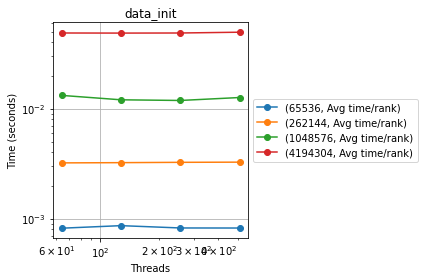

<Figure size 1440x1440 with 0 Axes>

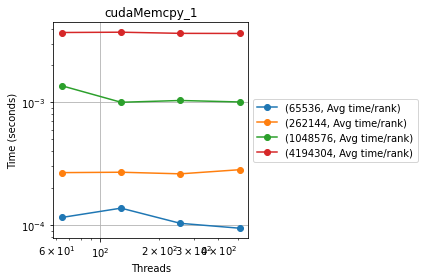

<Figure size 1440x1440 with 0 Axes>

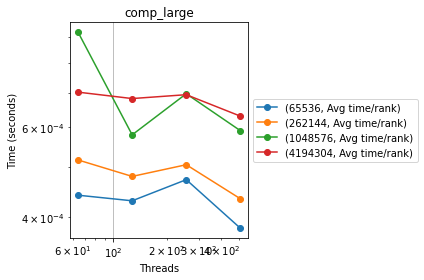

<Figure size 1440x1440 with 0 Axes>

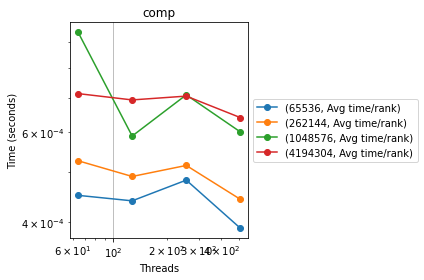

<Figure size 1440x1440 with 0 Axes>

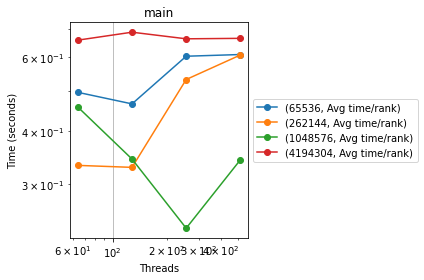

<Figure size 1440x1440 with 0 Axes>

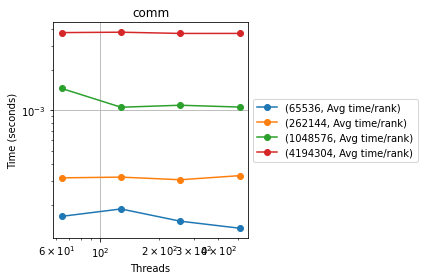

<Figure size 1440x1440 with 0 Axes>

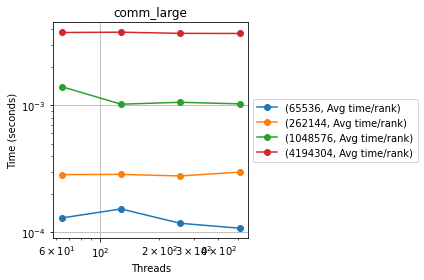

In [50]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [51]:
ctk.dataframe

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         64               0.495571      0.332067      0.457133   
             128              0.465160      0.328475      0.343786   
             256              0.604006      0.531673      0.235333   
             512              0.609716      0.608071      0.342254   
comm         64               0.000164      0.000316      0.001449   
             128              0.000186      0.000320      0.001053   
             256              0.000151      0.000306      0.001089   
             512              0.000134      0.000328      0.001056   
comm_large   64               0.000130      0.000285      0.001399   
             128              0.000153      0.000286      0.001019   
             256              0.000118      0.000278      0.001055   
             512              0.000108      0.000298      0.001025   
cudaMemcpy_1 64               0.000115      0.000267      0.001365   
             128              0.000137      0.000269      0.001001   
             256              0.000103      0.000261      0.001035   
             512              0.000094      0.000282      0.001007   
comp         64               0.000451      0.000527      0.000940   
             128              0.000440      0.000491      0.000589   
             256              0.000483      0.000516      0.000709   
             512              0.000389      0.000443      0.000600   
comp_large   64               0.000441      0.000517      0.000920   
             128              0.000430      0.000480      0.000579   
             256              0.000473      0.000506      0.000697   
             512              0.000380      0.000434      0.000590   
data_init    64               0.000820      0.003216      0.013201   
             128              0.000865      0.003232      0.012039   
             256              0.000824      0.003254      0.011874   
             512              0.000823      0.003266      0.012627   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         64               0.659693  
             128              0.689057  
             256              0.664524  
             512              0.666225  
comm         64               0.003756  
             128              0.003781  
             256              0.003702  
             512              0.003703  
comm_large   64               0.003730  
             128              0.003750  
             256              0.003673  
             512              0.003663  
cudaMemcpy_1 64               0.003712  
             128              0.003733  
             256              0.003653  
             512              0.003646  
comp         64               0.000713  
             128              0.000693  
             256              0.000705  
             512              0.000640  
comp_large   64               0.000702  
             128              0.000682  
             256              0.000694  
             512              0.000630  
data_init    64               0.048727  
             128              0.048626  
             256              0.048719  
             512              0.049538

## STRONG SCALING ------------------------------------------------------------------------------------


In [22]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("everything/*.cali"))

In [23]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         163954173     1  regionprofile   
                                             326140011     1  regionprofile   
                                             559730029     1  regionprofile   
                                             913823014     1  regionprofile   
                                             1004594117    1  regionprofile   
                                             1180476513    1  regionprofile   
                                             1718441184    1  regionprofile   
                                             1741210511    1  regionprofile   
                                             1841032922    1  regionprofile   
                                             2188916940    1  regionprofile   
                                             2332563332    1  regionprofile   
                                             2387394561    1  regionprofile   
                                             2483569216    1  regionprofile   
                                             3487736843    1  regionprofile   
                                             3654775129    1  regionprofile   
                                             3681567656    1  regionprofile   
{'name': 'comm', 'type': 'function'}         163954173     3  regionprofile   
                                             326140011     3  regionprofile   
                                             559730029     3  regionprofile   
                                             913823014     3  regionprofile   
                                             1004594117    3  regionprofile   
                                             1180476513    3  regionprofile   
                                             1718441184    3  regionprofile   
                                             1741210511    3  regionprofile   
                                             1841032922    3  regionprofile   
                                             2188916940    3  regionprofile   
                                             2332563332    3  regionprofile   
                                             2387394561    3  regionprofile   
                                             2483569216    3  regionprofile   
                                             3487736843    3  regionprofile   
                                             3654775129    3  regionprofile   
                                             3681567656    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   163954173     4  regionprofile   
                                             326140011     4  regionprofile   
                                             559730029     4  regionprofile   
                                             913823014     4  regionprofile   
                                             1004594117    4  regionprofile   
                                             1180476513    4  regionprofile   
                                             1718441184    4  regionprofile   
                                             1741210511    4  regionprofile   
                                             1841032922    4  regionprofile   
                                             2188916940    4  regionprofile   
                                             2332563332    4  regionprofile   
                                             2387394561    4  regionprofile   
                                             2483569216    4  regionprofile   
                                             3487736843    4  regionprofile   
                                             3654775129    4  regionprofile   
                                             3681567656    4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 163954173     5  regionprofile   
                            

In [24]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
163954173,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223876,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,ReverseSorted,64,1024,4,Handwritten
326140011,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224177,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,1perturbed,64,1024,4,Handwritten
559730029,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223238,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,256,256,4,Handwritten
913823014,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027183,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,128,512,4,Handwritten
1004594117,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223226,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,128,512,4,Handwritten
1180476513,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224183,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,1perturbed,128,512,4,Handwritten
1718441184,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700021535,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,64,1024,4,Handwritten
1741210511,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223247,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,512,128,4,Handwritten
1841032922,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223897,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,ReverseSorted,128,512,4,Handwritten


In [25]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [26]:
gb = tk.groupby("InputType")

4  thickets created...
{'1perturbed': <thicket.thicket.Thicket object at 0x2b7aaab96100>, 'Random': <thicket.thicket.Thicket object at 0x2b7aaaaf5130>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x2b7aaab84310>, 'Sorted': <thicket.thicket.Thicket object at 0x2b7aab38f130>}


In [27]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [28]:
ctk.dataframe

1perturbed  \
                                                                nid   
node                                         num_threads              
{'name': 'main', 'type': 'function'}         64                   1   
                                             128                  1   
                                             256                  1   
                                             512                  1   
{'name': 'comm', 'type': 'function'}         64                   3   
                                             128                  3   
                                             256                  3   
                                             512                  3   
{'name': 'comm_large', 'type': 'function'}   64                   4   
                                             128                  4   
                                             256                  4   
                                             512                  4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                   5   
                                             128                  5   
                                             256                  5   
                                             512                  5   
{'name': 'comp', 'type': 'function'}         64                   6   
                                             128                  6   
                                             256                  6   
                                             512                  6   
{'name': 'comp_large', 'type': 'function'}   64                   7   
                                             128                  7   
                                             256                  7   
                                             512                  7   
{'name': 'data_init', 'type': 'function'}    64                   2   
                                             128                  2   
                                             256                  2   
                                             512                  2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128       

In [29]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "spot.channel"), ("Random", "spot.channel"), ("ReverseSorted", "spot.channel"), ("Sorted", "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "nid"), ("Random", "nid"), ("ReverseSorted", "nid"), ("Sorted", "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [30]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [31]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Min time/rank"), ("Random", "Min time/rank"), ("ReverseSorted", "Min time/rank"), ("Sorted", "Min time/rank")], axis=1)

In [32]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Max time/rank"), ("Random", "Max time/rank"), ("ReverseSorted", "Max time/rank"), ("Sorted", "Max time/rank")], axis=1)

In [33]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Total time"), ("Random", "Total time"), ("ReverseSorted", "Total time"), ("Sorted", "Total time")], axis=1)

In [34]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [35]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [36]:
ctk.dataframe

1perturbed        Random ReverseSorted  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         64               0.333989      0.495571      0.314719   
             128              0.334907      0.465160      0.318824   
             256              0.321497      0.604006      0.319632   
             512              0.320888      0.609716      0.319725   
comm         64               0.000143      0.000164      0.000160   
             128              0.000156      0.000186      0.000143   
             256              0.000151      0.000151      0.000144   
             512              0.000152      0.000134      0.000152   
comm_large   64               0.000110      0.000130      0.000128   
             128              0.000121      0.000153      0.000111   
             256              0.000119      0.000118      0.000112   
             512              0.000110      0.000108      0.000121   
cudaMemcpy_1 64               0.000097      0.000115      0.000113   
             128              0.000104      0.000137      0.000097   
             256              0.000098      0.000103      0.000098   
             512              0.000097      0.000094      0.000106   
comp         64               0.000435      0.000451      0.000455   
             128              0.000478      0.000440      0.000418   
             256              0.000424      0.000483      0.000418   
             512              0.000428      0.000389      0.000414   
comp_large   64               0.000426      0.000441      0.000446   
             128              0.000468      0.000430      0.000409   
             256              0.000415      0.000473      0.000410   
             512              0.000419      0.000380      0.000405   
data_init    64               0.001182      0.000820      0.000280   
             128              0.001179      0.000865      0.000277   
             256              0.001178      0.000824      0.000281   
             512              0.001190      0.000823      0.000282   

                                Sorted  
                         Avg time/rank  
name         num_threads                
main         64               0.473958  
             128              0.494237  
             256              0.332196  
             512              0.332821  
comm         64               0.000163  
             128              0.000161  
             256              0.000143  
             512              0.000144  
comm_large   64               0.000130  
             128              0.000129  
             256              0.000111  
             512              0.000112  
cudaMemcpy_1 64               0.000114  
             128              0.000114  
             256              0.000097  
             512              0.000098  
comp         64               0.000449  
             128              0.000470  
             256              0.000425  
             512              0.000399  
comp_large   64               0.000440  
             128              0.000460  
             256              0.000416  
             512              0.000390  
data_init    64               0.000236  
             128              0.000246  
             256              0.000225  
             512              0.000245

In [37]:
# ctk.dataframe = ctk.dataframe.loc[:,(65536)]

# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1
# ctk.dataframe

In [38]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [39]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

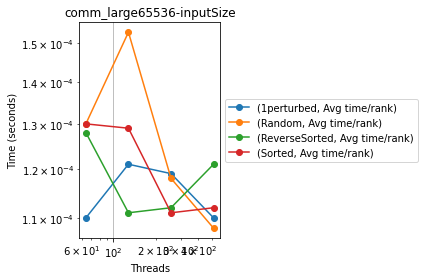

<Figure size 1440x1440 with 0 Axes>

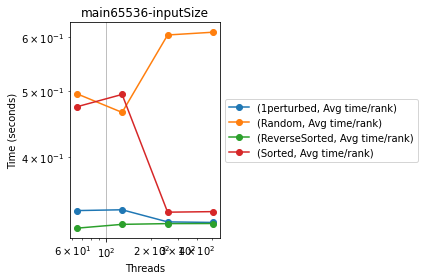

<Figure size 1440x1440 with 0 Axes>

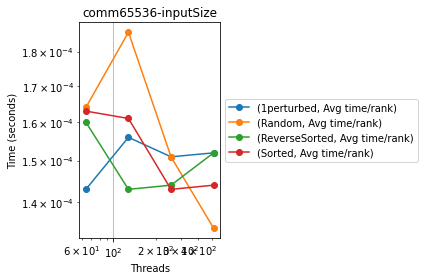

<Figure size 1440x1440 with 0 Axes>

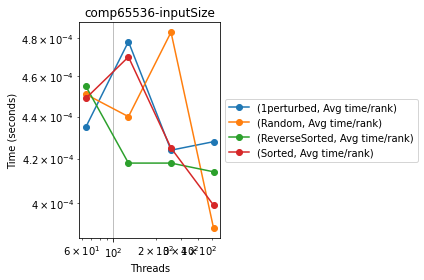

<Figure size 1440x1440 with 0 Axes>

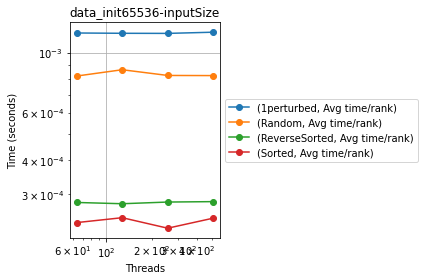

<Figure size 1440x1440 with 0 Axes>

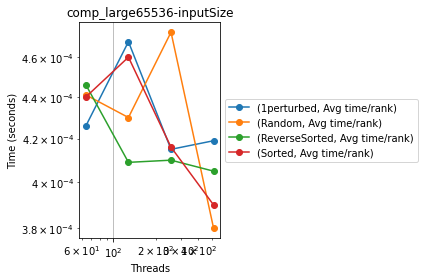

<Figure size 1440x1440 with 0 Axes>

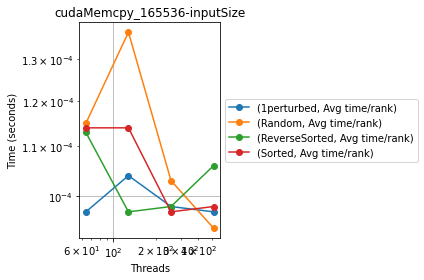

In [40]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name+"65536-inputSize",
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()